In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### **Convolutions in 1D**

**We learnt about the convolution operation in lecture, and now it's time you implemented your own convolution operation, and explore some of its properties.**

**Before we try and write our own simple convolution function, let's see an example using numpy. Create two random 1D numpy arrays called f and h, of length 10 and 3, with integer values ranging between 0 and 9 (inclusive). Print them.**

In [2]:
f = np.random.randint(0,10,10)
h = np.random.randint(0,10,3)
print(f)
print(h)

[9 5 8 8 9 3 3 9 0 8]
[2 7 9]


**We can then use numpy's convolution operation to perform a simple convolution. Please use numpy.convolve to perform the operation f∗h. Make sure that you set the mode of the convolve operation to 'valid'. Print the result and the shape of the result.**

In [3]:
g = np.convolve(f, h, 'valid')
print(g)

[132 117 146 141 108  66  90  97]


**Is the shape what you expected? Why is this the shape of the resulting array?**

This was the shape I expected since the center of the convolution kernel is valid over 8 positions of the other array.

**Perform the operation f∗h again using numpy's convolve function, but this time without the mode argument. Print the resulting signal and the shape.**

In [4]:
g = np.convolve(f, h)
print(g)

[ 18  73 132 117 146 141 108  66  90  97  56  72]


**Notice that the shape is different now, and it is larger than f or h. Why is this so?**

This is the case because rather than only looking at valid center positions of the kernel, we now can look at any overlap between the kernel and the other matrix. There are more overlapping positions than valid center positions.

**Now that we've been able to use numpy's convolution function to convolve two signals, let's implement our own. Implement the convolution_1D function below by filling in the indices to signal and kernel, to perform the same operation that numpy.convolve does with the default mode. Make sure that the output is what is expected.**

In [5]:
def convolution_1D(signal, kernel):
  """ Performs the convolution operation f ∗ h.
      Args: 
          f: A 1D numpy array with length [n]
          h: A 1D numpy array with length [m]
  """

  total_len = len(signal) + len(kernel) - 1
  result = np.zeros(total_len)

  for n in range(total_len):
    
    # For indexing to make sure that we only care about overlaps in range
    kmin = max(0, n - (len(kernel) - 1))
    kmax = min(n, len(signal) - 1)
    
    for k in range(kmin, kmax + 1):
      # Fill in the indices to signal and that represent the convolution operation
      result[n] += signal[k] * kernel[n-k]
    
  return result
      
g = convolution_1D(f, h)
print(g)
print(g.shape)

[ 18.  73. 132. 117. 146. 141. 108.  66.  90.  97.  56.  72.]
(12,)


**We see that both the default mode and valid mode for convolution changes the size of the input signal array. Sometimes that's nice, but often we want the output signal to be the same size as the input signal. Perform the operation f∗h using numpy.convolve, with the mode argument as 'same'. Print its contents and shape.**

In [6]:
g = np.convolve(f, h, 'same')
print(g)

[ 73 132 117 146 141 108  66  90  97  56]


### **Convolutions in 2D**

**We've just seen convolution in 1D by implementing our own simple convolution function, and also used numpy's convolve function. Now we want to do the same with 2D convolution. Unfortunately numpy doesn't have a built-in function for 2D convolution, so we'll use scipy instead.**

**Create a 5x5 2D array called image that is filled with ones with dtype=int. Create a 3x3 2D array called kernel that filled with ones with dtype=int. Print them.**

In [7]:
image = np.ones((5,5), dtype=np.int)
kernel = np.ones((3,3), dtype=np.int)
print(image)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


**Now using scipy's convolve2d, perform a convolution between the image and the kernel above. Do so using the mode 'full', then 'valid', then 'same'. Print the resulting matrices and their respective shapes.**

In [8]:
from scipy import signal

a = signal.convolve2d(image, kernel, 'full')
print("full: \n", a)
b = signal.convolve2d(image, kernel, 'valid')
print("valid: \n", b)
c = signal.convolve2d(image, kernel, 'same')
print("same: \n", c)

full: 
 [[1 2 3 3 3 2 1]
 [2 4 6 6 6 4 2]
 [3 6 9 9 9 6 3]
 [3 6 9 9 9 6 3]
 [3 6 9 9 9 6 3]
 [2 4 6 6 6 4 2]
 [1 2 3 3 3 2 1]]
valid: 
 [[9 9 9]
 [9 9 9]
 [9 9 9]]
same: 
 [[4 6 6 6 4]
 [6 9 9 9 6]
 [6 9 9 9 6]
 [6 9 9 9 6]
 [4 6 6 6 4]]


**Observe that the shapes are all different due to the way we handle boundary conditions and padding. Why are the values outside of the central 3x3 grid less than 9?**

The signal of same and full is padded with 0s so the averages computed during the convolutions, which essentially count how many 1s are in the window, are less than 9.

**We can also play around with what values we use for padding. Run the convolve2d operation again, this time with mode set as 'same' and fillvalue set as -1, and print out the result, observing the difference compared to when the fillvalue was the default 0.**

In [9]:
a = signal.convolve2d(image, kernel, 'same', fillvalue=-1)
print(a)

[[-1  3  3  3 -1]
 [ 3  9  9  9  3]
 [ 3  9  9  9  3]
 [ 3  9  9  9  3]
 [-1  3  3  3 -1]]


**Using the same image and kernel, perform a convolve2d operation, this time with mode set as 'same' and boundary set as 'symm', and another convolve2d operation, this time with mode set as 'same' and fillvalue set as 1. Print the results.**

In [10]:
a = signal.convolve2d(image, kernel, 'same', boundary='symm')
print("full: \n", a)
b = signal.convolve2d(image, kernel, 'same', fillvalue=1)
print("full: \n", b)

full: 
 [[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]
full: 
 [[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]


**Why are the results the same?**

Since the signal matrix is all ones, using symmetric edge values or filling with ones both results in ones around the borders.

### **Smoothing Kernels in 2D**

**So why are convolutions used? A major application for convolutions is for image filtering, of which smoothing is quite common.**

**Let's first get an image we can play with. Similar to the first week's notebook, if you aren't able to access your webcam, or you are running on Colab, then you can instead place an image in your local directory with the name testimg.jpg.**

(3264, 2448, 3)


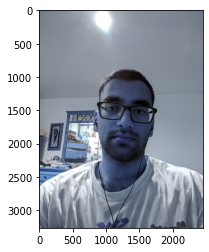

In [11]:
import cv2
# cap = cv2.VideoCapture(0)
# if not (cap.isOpened()):
#     print('Could not open video device')
# else:
#   ret, frame = cap.read()
#   cv2.imwrite('testim.jpg',frame)

frame = cv2.imread('testim.jpg')
plt.imshow(frame)
print(frame.shape)

**Using cv2 we can resize the image so it's around 400 x 400, since convolution takes a little longer if the images are too big, and if the images are too small, it's hard to see the difference. We also grayscale the image.** 

(400, 533)


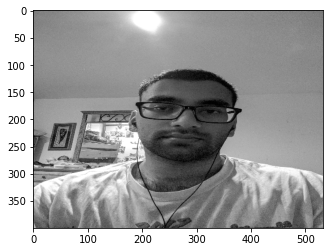

In [12]:
def_width = 400
def_height = (frame.shape[0] * def_width) // frame.shape[1]

frame = cv2.resize(frame, dsize=(def_height, def_width), interpolation=cv2.INTER_CUBIC)
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_frame, cmap='gray')
print(gray_frame.shape)

**We saw in class that one of the filters used is a box filter. Let's try and implement that. Create a 2d box filter of size 20 x 20. Convolve your grayscaled image with this box filter (from here on out we default to mode = 'same') and plot the results.**

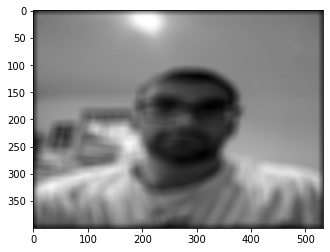

In [13]:
kernel = 1/400 * np.ones((20,20))
blur = signal.convolve2d(gray_frame, kernel, 'same')
plt.imshow(blur, cmap='gray')

**Observe that indeed there is blurring, but also notice the boxy artifacts present because of the box filter. We talked about in lecture how a gaussian filter would not have these artifacts. Below is a simple function for creating a 2D gaussian kernel.** 

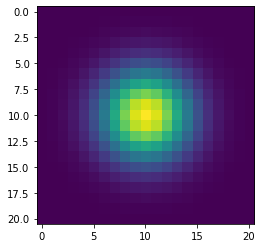

In [14]:
def gaussian_kern(kernel_size=21, sigma=3):
    """Returns a 2D Gaussian kernel."""

    gkern1d = signal.gaussian(kernel_size, std=sigma).reshape(kernel_size, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

plt.imshow(gaussian_kern())

**Using the above function, create a kernel of size 21 with sigma as 7, and then convolve that with your image. Plot the result**

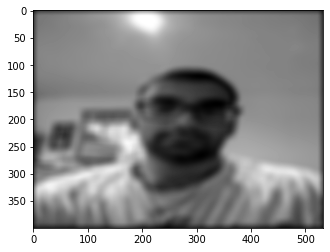

In [15]:
kernel = gaussian_kern(21,7)
blur = signal.convolve2d(gray_frame, kernel, 'same')
plt.imshow(blur, cmap='gray')

**Observe how there are no blocky artifacts seen in this filtered image, since we are using a gaussian kernel instead of a box filter. Play around by changing the gaussian kernel size, and also the sigma of the kernel. What does changing either of the values do?**

It appears that increasing either the size or the sigma value increases the blurriness of the resulting image.

**Note that gaussian filtering is a common enough operation that scipy already has an implementation of this. Using scipy.ndimage.gaussian_filter, perform filtering using sigma=7, and plot the resulting image.**

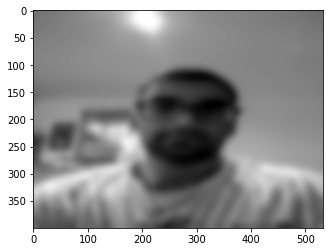

In [16]:
from scipy.ndimage import gaussian_filter
blur = gaussian_filter(gray_frame, 7)
plt.imshow(blur, cmap='gray')

**Something interesting about gaussian filtering is that because of the associativity property of convolutions, successive gaussian blurring operations are the same as a single, larger gaussian blur operation. The equation (which you could try and prove yourself) is $\sigma=\sqrt(\sigma_1^2 + \sigma_2^2)$**

**Below, filter your grayscaled image via scipy's gaussian filter function in two different ways. For the first method, filter your image twice, the first time with a sigma=6, and then with a sigma=8. For the second method, filter the grayscaled image once, with sigma=10**

**Compare the results by plt.imshow(first_method - second_method), followed by plt.colorbar() to confirm that the difference is insignificant.**

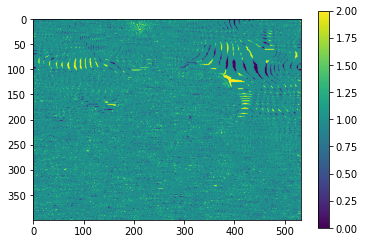

In [17]:
b1 = gaussian_filter(gray_frame, 6)
b2 = gaussian_filter(b1, 8)
b3 = gaussian_filter(gray_frame, 10)

plt.imshow(b3 - b2)
plt.colorbar()

### **Convolution Properties**

**Let's demonstrate numerically some properties of the convolution operation. Create:**

*   f: 1D array of size 8 of random integers from 0 to 9 (inclusive)
*   h: 1D array of size 8 of random integers from 0 to 9 (inclusive)
*   g: 1D array of size 5 of random integers from 0 to 9 (inclusive)
*   f2: 2D array of size 5x5 of random integers from 0 to 9 (inclusive)
*   h2: 2D array
 of size 3x3 of random integers from 0 to 9 (inclusive)
*   g2: 2D array of size 4x4 of random integers from 0 to 9 (inclusive)


In [18]:
f = np.random.randint(0, 10, 8)
g = np.random.randint(0, 10, 8)
h = np.random.randint(0, 10, 5)

f2 = np.random.randint(0, 10, (5,5))
g2 = np.random.randint(0, 10, (3,3))
h2 = np.random.randint(0, 10, (4,4))

**First we want to show numerically that the convolution operation is commutative. Use numpy.convolve to perform the operation f∗h, and the operation h∗f. Print both results. Use np.all to make sure that all values are identical.**

In [19]:
c1 = np.convolve(f, h)
c2 = np.convolve(h, f)

print("f * h: ", c1)
print("h * f: ", c2)
print(np.all(c1 == c2))

f * h:  [ 32  48  26  30  94 105  50 102 107  42  36  30]
h * f:  [ 32  48  26  30  94 105  50 102 107  42  36  30]
True


**We can also show numerically that the convolution operation is associative. Use numpy.convolve to perform the operation f∗h∗g in two different ways. For the first way, first do h∗g, then convolve the result of that with f. For the second way, first do f∗h, then convolve the result of that with g. Print both results, and use np.all to make sure that all values are identical.**

In [20]:
c1 = np.convolve(h, g)
c2 = np.convolve(f, c1)

c3 = np.convolve(f, h)
c4 = np.convolve(c3, g)

print("f * (h * g): \n", c2)
print("(f * h) * g: \n", c4)
print(np.all(c2 == c4))

f * (h * g): 
 [ 256  576  656  796 1430 2100 2186 2813 3291 3114 3042 3026 2702 1953
 1725 1354  654  378  240]
(f * h) * g: 
 [ 256  576  656  796 1430 2100 2186 2813 3291 3114 3042 3026 2702 1953
 1725 1354  654  378  240]
True


**We see that the results are identical, thereby showing that convolutions are commutative and associative. Prove numerically the same thing in 2D, using the f2, h2, and g2 formed previously, and scipy's convolve2d function.**

In [21]:
c1 = signal.convolve2d(f2, h2)
c2 = signal.convolve2d(h2, f2)

print("f2 * h2: \n", c1)
print("h2 * f2: \n", c2)
print(np.all(c1 == c2))

c1 = signal.convolve2d(h2, g2)
c2 = signal.convolve2d(f2, c1)

c3 = signal.convolve2d(f2, h2)
c4 = signal.convolve2d(c3, g2)

print("f2 * (h2 * g2): \n", c2)
print("(f2 * h2) * g2: \n", c4)
print(np.all(c2 == c4))

f2 * h2: 
 [[  0  18  57  51  60  54  18  12]
 [ 18  36  64  74  89  91  39  36]
 [ 57 107 160 199 173 211  48  77]
 [ 84 200 244 306 262 287 101 111]
 [ 43 209 273 419 362 342 143 132]
 [ 18 142 176 330 288 332 137 151]
 [  0  41 112 171 185 226  66 120]
 [  0   0  21  31  65  80  39  54]]
h2 * f2: 
 [[  0  18  57  51  60  54  18  12]
 [ 18  36  64  74  89  91  39  36]
 [ 57 107 160 199 173 211  48  77]
 [ 84 200 244 306 262 287 101 111]
 [ 43 209 273 419 362 342 143 132]
 [ 18 142 176 330 288 332 137 151]
 [  0  41 112 171 185 226  66 120]
 [  0   0  21  31  65  80  39  54]]
True
f2 * (h2 * g2): 
 [[    0   108   396   585   855   810   630   450   144    72]
 [  108   270   690  1209  1623  1761  1551  1185   474   264]
 [  342  1011  2361  3560  4046  4575  3370  2701   969   618]
 [  612  2097  4021  5988  6779  7337  5837  4394  1843  1010]
 [  600  2901  5732  9188 10363 11035  8688  5983  2877  1313]
 [  612  2993  5955  9549 11225 12446  9868  7153  3496  1545]
 [  258  1934  

**We saw in class that convolutions can be computed by reversing the kernel, and sliding it over the signal and taking the dot product at all locations. Though this is simple to implement and understand, it is slow for larger arrays.**

**What we can use is the Fast Fourier Transform to compute the convolution. One of the most important properties to know is that convolution in the time domain is multiplication in the frequency domain. Since multiplication can be done much faster than convolution, we can perform a convolution by moving the signal and kernel to the frequency domain, multiplying them, and then moving them back to the time domain.**

**Though this would be cool to implement, this is outside the scope of the class, so instead we'll use scipy's fftconvolve to show how much faster it is.**

**Create a 1D array of length 1,000,000 of random numbers, and a kernel of size 10,000 also of random numbers. Convolve them using signal.convolve with method='direct'**

In [22]:
from scipy import signal
import time

sig = np.random.randint(0,10,1000000)
ker = np.random.randint(0,10,10000)

start = time.time()

signal.convolve(sig, ker, method='direct')

print("This took ", time.time() - start, " seconds")

This took  8.09557557106018  seconds


**Notice the amount of time that took. If it didn't take long, increase the size of the arrays so that it takes a couple of seconds. Now repeat it with method='fft'**

In [23]:
start = time.time()
signal.convolve(sig, ker, method='fft')
print("This took ", time.time() - start, " seconds")

This took  0.0906362533569336  seconds


**Notice how much faster it was using FFT to perform the convolution. Besides explicitly setting the method to 'fft', scipy also has scipy.signal.fftconvolve that defaults to using FFT.**

### **Median Filtering**

**Instead of doing an averaging using a gaussian or box filter, another type of filtering called median filtering exists. It's useful for removing salt and pepper noise in images, which gaussian blurring isn't quite able to remove.**

**Let's create an image with some salt and pepper noise. Create a 2D array of zeros of size 50 by 50. Set around 5% of the pixels randomly to be 255 in value. Plot it.**

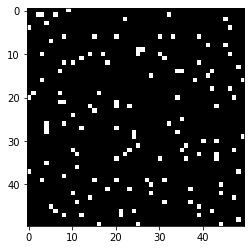

In [24]:
import random

i = 50
arr = np.zeros((i,i))
indices = np.random.choice(np.arange(i * i), replace=False,
                           size=int(i * i * 0.05))

r = (indices / i).astype(np.int)
c = indices % i
arr[r, c] = 255

plt.imshow(arr,  cmap='gray')

**Now try and remove the noise via gaussian blurring. Try a variety of sigmas to see whether the noise can be removed**

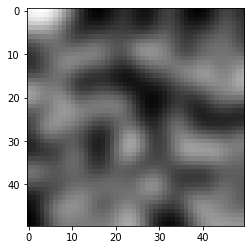

In [25]:
b1 = gaussian_filter(arr, 3)
plt.imshow(b1, cmap='gray')

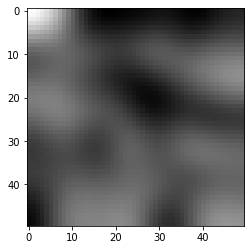

In [26]:
b2 = gaussian_filter(arr, 5)
plt.imshow(b2, cmap='gray')

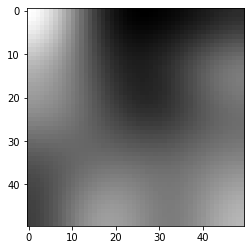

In [27]:
b3 = gaussian_filter(arr, 9)
plt.imshow(b3, cmap='gray')

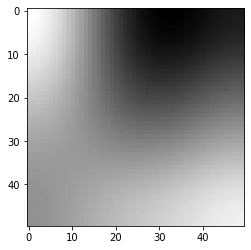

In [28]:
b4 = gaussian_filter(arr, 15)
plt.imshow(b4, cmap='gray')

**Now, try use median filtering. Scipy.ndimage has a nice implementation for you to use. Plot the results.**

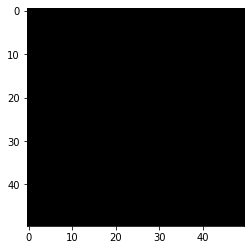

In [29]:
from scipy.ndimage import median_filter

m = median_filter(arr, 5)
plt.imshow(m, cmap='gray')

**Feel free to play around with the noise level and the median filter size to see what the relationship is.**

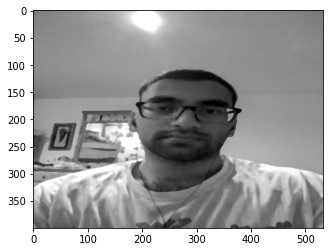

In [30]:
m2 = median_filter(gray_frame, 5)
plt.imshow(m2, cmap='gray')

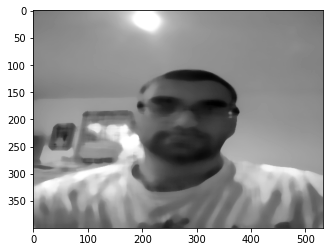

In [31]:
m3 = median_filter(gray_frame, 15)
plt.imshow(m3, cmap='gray')

Increasing the filter size, results in a lower resolution result.